## A) Carga de datos y primeros an√°lisis
Para la carga de datos se utiliza la API de Kaggle desde Google Colab para realizar este procedimiento se sigue la gu√≠a del siguiente [link](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2.)

<center>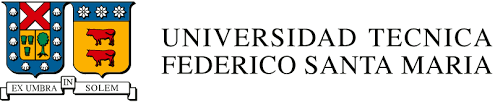</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-577 Redes Neuronales Artificiales 2022-2 </h1>

<H3 align='center'> Tarea Guiada I  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones de datos con pandas y numpy
* Imputaci√≥n de datos y preprocesamientos
* Redes Densas Feed Forward
* Regularizaci√≥n y Dropout
* Vanishing Gradient
* Learn Rate Decay
* Optimizadores

<hr style="height:2px;border:none"/>

[![Open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1yaRgqtEhikTnTfCKze8L59UDF_R_Tb_m?usp=sharing)


## 1 - Redes Feed Forward para predicci√≥n de diabetes.

In [ ]:
# Library installation
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Upload file api key of kaggle 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yerielpaz","key":"eb3031dff19821bfb83c83135987e326"}'}

In [ ]:
# Api key file management and permissions 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset 
!kaggle datasets download -d uciml/pima-indians-diabetes-database

# File extraction 
import zipfile
with zipfile.ZipFile('/content/pima-indians-diabetes-database.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 7.45MB/s]


Luego de descomprimir el archivo descargado  se cargan los datos en un *Dataframe* como muestra el c√≥digo de la celda siguiente. Adem√°s se realiza Exploratory Data Analysis (EDA).

In [ ]:
import pandas as pd

df = pd.read_csv("diabetes.csv", encoding = 'utf_8')
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

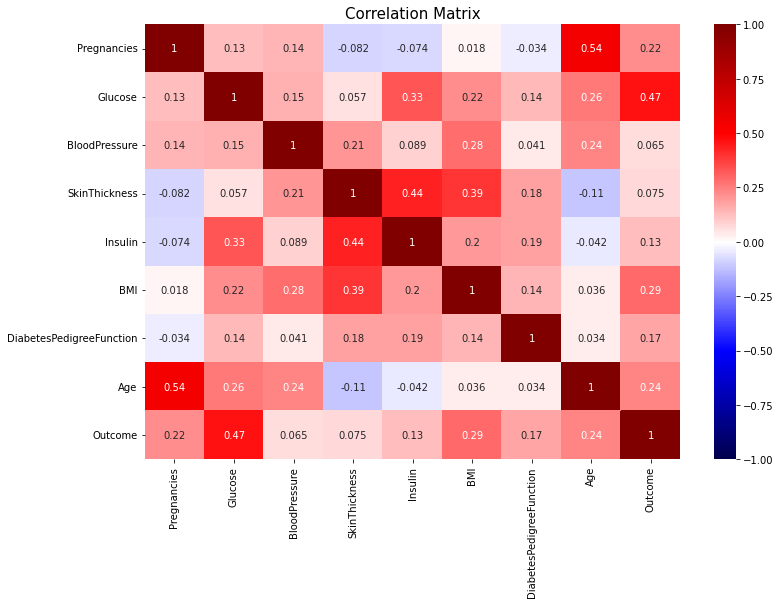

In [ ]:
# Function to display the correlation matrix in a heat map
import seaborn as sns
import matplotlib.pyplot as plt

def plot_corr_matrix(data,features=None,annot=True,s=(12,8)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr,annot=annot,
        xticklabels=corr.columns,
    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()

plot_corr_matrix(df)

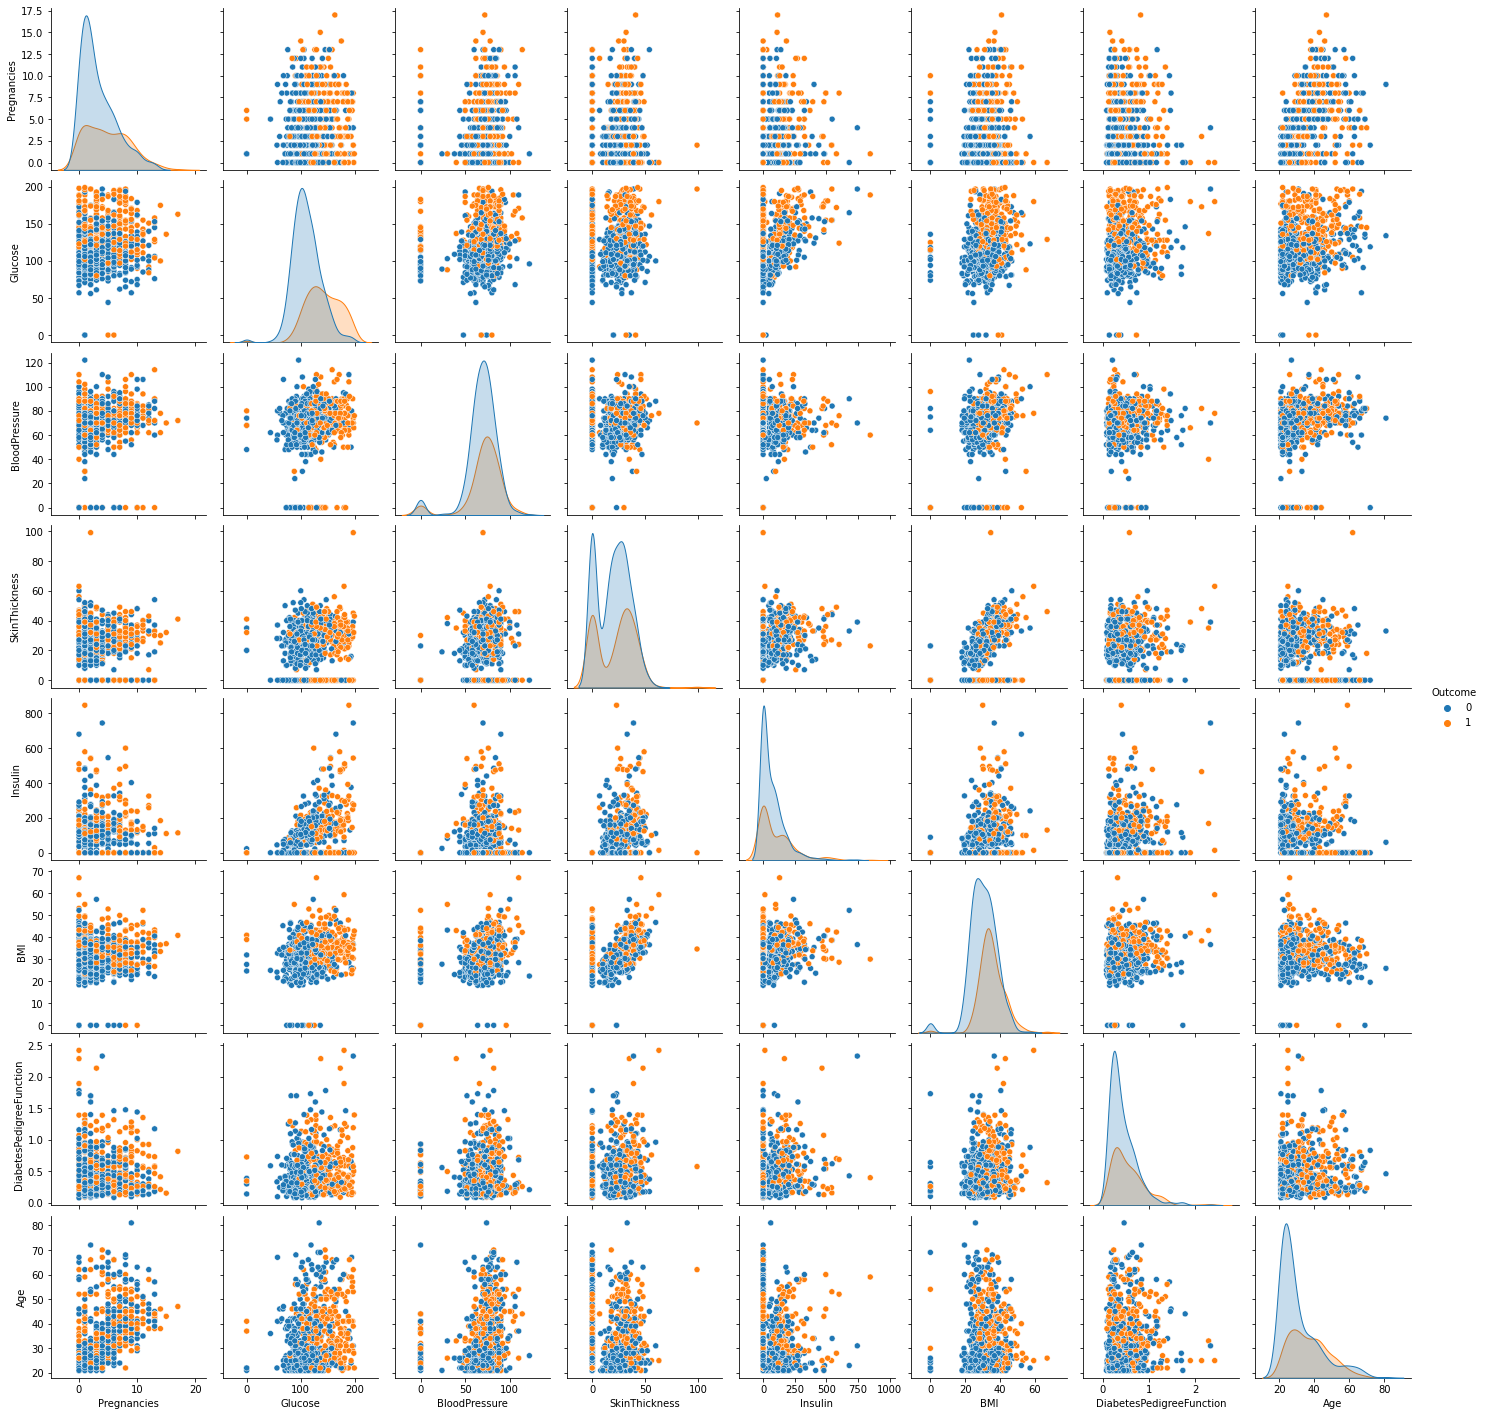

In [ ]:
# EDA with all dataset
sns.pairplot(df, hue ='Outcome')

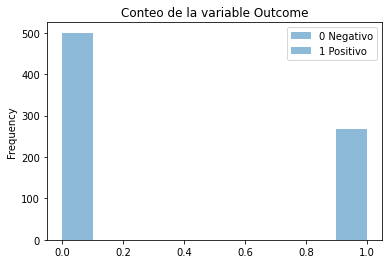

In [ ]:
# Show balance of target label
plt.title("Conteo de la variable Outcome")
df['Outcome'].plot.hist(bins=10, alpha=0.5)
plt.legend(['0 Negativo','1 Positivo'])
plt.show()

- Luego del EDA se observa que no existe datos faltantes dentro del dataset. Pero realizando una exploraci√≥n de las features del dataset se puede apreciar que los datos est√°n imputados utilizando ceros ya que hay columnas como *Glucose, BloodPressure, SkinThickness, Insulin, BMI* toma como valor minimo el cero, cosa que no tiene sentido en el mundo real dado a que esto implica que un paciente se encuentra muerto. Esto hace que la informaci√≥n que entrega el m√©todo *describe()* no se del todo correcta ya que las medidas de tendencia central se ven afectados por estos outliers

- La variable Outcome es un muy buen candidato a ser el target para el problema dado a que presenta una alta correlaci√≥n con el resto del dataset, lo que implica que la dispersi√≥n de los datos no es alta. Ademas existen pares de variables en donde los datos son separables tal como se observa en los gr√°ficos de *Age vs Glucose* o *BloodPressure vs Glucose* generados con seaborn

<center>


|                          |   Rango Noramal  | Ref  |
|:------------------------:|:----------------:|:----:|
|          Glucose         | 80 - 120 [mg/dl] | [link](https://diabeteswalls.blogspot.com/2019/08/niveles-de-glucosa-en-sangre-diabetes.html)      |
|  BloodPressure sistolica |     90 - 120     | [link](https://www.dietdoctor.com/es/presion-arterial/normal)    |
| BloodPressure diastolica |      60 - 80     | [link](https://www.dietdoctor.com/es/presion-arterial/normal)  |
|       SkinThickness      |   0.05 - 5 [mm]  | [link](https://www.eucerin.com.mx/acerca-de-la-piel/conocimientos-basicos-sobre-la-piel/estructura-y-funcion-de-la-piel)        |
|          Insulin         | 60 - 100 [mg/dl] | [link](https://dtc.ucsf.edu/es/tipos-de-diabetes/diabetes-tipo-2/tratamiento-de-la-diabetes-tipo-2/medicamentos-y-terapias-2/prescripcion-de-insulina-para-diabetes-tipo-2/informacion-basica-sobre-la-insulina/)     |
|            BMI           |    18.5 - 24.9   |  [link](https://www.cdc.gov/healthyweight/spanish/assessing/index.html)    |


</center>

## B) Train Test Split

El dataset se separa en en los conjuntos de entrenamiento, validaci√≥n y test y estandarizar los datos. Para realizar esta tarea se utiliza *sklearn.model_selection*. En donde los $X$  representar las features e  $Y$ el target. La separaci√≥n del dataset se realiza considerando un  70%  de ellos para entrenamiento, un  20%  para validaci√≥n y un  10%  para test.

In [ ]:
from sklearn.model_selection import train_test_split

# Separating X and y 
y = df.Outcome
X = df.drop(columns=['Outcome'])

# Separating train and test
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

# Separating train and validation
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=19)

print(f' df    :{df.shape[0]}\n X_tr  :{X_tr.shape[0]}\n X_val :{X_val.shape[0]}\n X_test  :{X_test.shape[0]}')

 df    :768
 X_tr  :552
 X_val :139
 X_test  :77


Con la separaci√≥n del dataset ahora se consta con un conjunto con el cual entrenar a una m√°quina de aprendizaje/red neuronal y genera diferentes modelos de los cuales se escoger√° uno a partir del los datos de validaci√≥n y con los datos se test se verificara el rendimiento del modelo escogido lo mas importante de esta separaci√≥n es tener en cuanta que los datos de test nunca se usaran para generar un modelo si no que solo para medir el rendimiento de este

## C) Valores faltantes e imputaci√≥n
Tomando en cuenta solamente el conjunto de entrenamiento, se consideran los valores imputados con 0 y se reemplazan por `NaN`, para esto utiliza el m√©todo `replace`. Ademas se cuentan cuantos datos faltantes hay por cada atributo y se graf√≠ca. 

Se crean 3 conjuntos de entrenamiento nuevos a partir del resultado de reemplazar con `NaN`:

1.   Conserve el conjunto de entrenamiento original intacto: $X_o$
2.   Reemplace los valores faltantes de cada columna por la media de estos: $X_1$
3.   Reemplace los valores faltantes de cada columna por la mediana de estos: $X_2$
4.   Reemplace los valores faltantes de cada columna utilizando el m√©todo MICE: $X_3$

In [ ]:
import numpy as np

X_tr[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_tr[['Glucose',
'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

X_tr.isna().sum()

Pregnancies                   0
Glucose                       4
BloodPressure                24
SkinThickness               158
Insulin                     266
BMI                           6
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

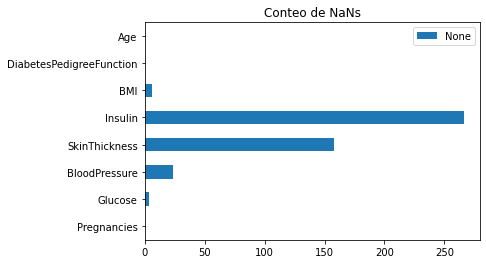

In [ ]:
plt.title("Conteo de NaNs")
X_tr.isna().sum().plot(kind='barh')
plt.legend()
plt.show()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from copy import deepcopy

# Simple imputer with mean or median
def Imputer(df, strategy_='mean'):
    df_ = deepcopy(df)
    imputer = SimpleImputer(strategy=strategy_)
    return pd.DataFrame(imputer.fit_transform(df_), columns=df_.columns)

def miceImputer(df,):
    df_ = deepcopy(df)
    imputer = IterativeImputer(max_iter=10, random_state=19, sample_posterior=True)
    return pd.DataFrame(imputer.fit_transform(df_), columns=df_.columns)

X = {'X_tr_0': deepcopy(X_tr.reset_index().drop('index',axis=1).replace(np.NaN,0)),
    'X_tr_1': Imputer(X_tr),
    'X_tr_2': Imputer(X_tr,'median'),
    'X_tr_3': miceImputer(X_tr)}

*   ¬øQu√© es la imputaci√≥n de datos?

La imputaci√≥n es la sustituci√≥n de valores no informados en una observaci√≥n por otros, es decir, es estimar el valor de un dato faltante bien sea usando la informaci√≥n de los registro vecinos o la informaci√≥n de las columnas o variables que sean parte de nuestro set de datos. 

*   ¬øCu√°les son las ventajas y desventajas de los 3 m√©todos reci√©n utilizados versus sin imputar ($X_o$)?

La imputaci√≥n siempre (por meadia o mediana) tienen un gran problema y es que para reemplazar el dato faltante se f√≠an de una √∫nica estimaci√≥n.

MICE en la pr√°ctica no cambia la distribuci√≥n obtenida sin embargo tampoco es perfecto porque para poderlo utilizar se debe garantizar que las variables est√°n relacionadas linealmente de no ser as√≠ se debe usar modelos estad√≠sticos m√°s sofisticados. 

*   ¬øQu√© se necesita para ejecutar cada uno de los 3 m√©todos de imputaci√≥n de datos?

La imputaci√≥n por la media o la mediana es la m√°s sencilla de todas simplemente se toman los valores conocidos en la variable donde est√°n los datos faltantes se calculan la media o la mediana y se reemplazan estos datos faltantes con cualquiera de estos dos valores.

Con MICE de forma interactiva se har√°n progresivamente cada vez mejores estimaciones de los datos faltantes inicialmente la primera estimaci√≥n no es muy buena y se hace con la imputaci√≥n por la media pero en los pasos restantes se aplica una regresi√≥n lineal entre pares consecutivos de columnas y el procedimiento se repite una y otra vez hasta completar un n√∫mero predefinido de iteraciones, la idea es que progresivamente las estimaciones sean cada vez m√°s precisas y se acerquen m√°s al valor real.

*   ¬øQu√© puede decir de los conjuntos resultantes?¬øResuelven el problema de los datos faltantes?

Si los tres mecanismos resuelven el problema de datos faltantes el problema est√° en los dos primeros mecanismos (imputaci√≥n por media y mediana) ya que la variable Insulin presenta muchos datos faltantes y estos mecanismos rompen la distribuci√≥n de los datos originales al momento de que se tienen muchos datos perdidos.


## D) Estandarizaci√≥n

`Nota:` A menos que se indique expl√≠citamente lo contrario, en esta y las siguientes secciones se realizan todos los procedimientos considerando como conjunto de entrenamiento cada $X \in \{X_o, X_1, X_2, X_3\}$ obtenido en la imputaci√≥n anterior.

Se procede a ajuste los scalers con los datos de entrenamiento y se transforman los datos para cada conjunto obtenido en la seccion anterior.



In [ ]:
from sklearn.preprocessing import StandardScaler

def scaler(X_tr, X_val, X_test):
    scaler_ = StandardScaler()
    scaler_.fit(X_tr)
    return (pd.DataFrame(scaler_.transform(X_tr), columns=X_tr.columns), 
            pd.DataFrame(scaler_.transform(X_val), columns=X_val.columns),
            pd.DataFrame(scaler_.transform(X_test), columns=X_test.columns)
    )

i=0
for key, item in list(X.items()):
    x_tr, x_val, x_test = scaler(item,X_val,X_test)
    X.update({key:x_tr})
    
    key = f'X_val_{i}'
    X.update({key:x_val})
    
    key = f'X_test_{i}'
    X.update({key:x_test})
    i+=1

- ¬øQu√© operaci√≥n matem√°tica realiza `StandarScaler` al momento de tranformar los datos? 

La idea detr√°s de StandardScaler es que transformar√° los datos de tal manera que su distribuci√≥n tendr√° un valor medio 0 y una desviaci√≥n est√°ndar de 1.
En el caso de los datos multivariados, esto se hace por caracter√≠sticas (en otras palabras, independientemente para cada columna de los datos).

Dada la distribuci√≥n de los datos, a cada valor del conjunto de datos se le restar√° el valor medio y se dividir√° por la desviaci√≥n est√°ndar de todo el conjunto de datos (o caracter√≠stica en el caso multivariante).

Standardization: $ z = x ‚àí \mu\sigma$

with mean: $\mu = \frac{1}{N}Œ£_{i=1}^{N}X_i$

and standard deviation: $ \sigma = \sqrt{\frac{1}{N} \Sigma_{i=1}^{N}(x_i - \mu)^2}$

- ¬øPor qu√© debemos transformar los datos de validaci√≥n y de test con el _scaler_ ajustado a los datos de entrenamiento? 

La raz√≥n es que queremos fingir que los datos de prueba son "datos nuevos, no vistos". Utilizamos el conjunto de datos de prueba para obtener una buena estimaci√≥n de c√≥mo se comporta nuestro modelo con cualquier dato nuevo.

Otra forma de decir lo mismo es si estandarizamos nuestro conjunto de datos de entrenamiento, necesitamos mantener los par√°metros (media y desviaci√≥n est√°ndar para cada caracter√≠stica). Entonces, usar√≠amos estos par√°metros para transformar nuestros datos de prueba y cualquier dato futuro m√°s adelante.

## E) Red Neuronal

Se construye una red neuronal. Para esto se utiliza la biblioteca keras que permite crear, compilar y entrenar los modelos de manera simple. 

La arquitectura corresponde a la de una red de una capa oculta con $256$ neuronas, activaci√≥n ReLu y una funci√≥n de perdida que corresponde a _Binary Cross Entropy_, junto con el optimizador Gradiente Descendente Estoc√°stico (SDG) con un _Learn Rate_ de 0.002. Y su entrenamiento sera durante 20 _epochs_.


- ¬øPorqu√© se ocupa esta funci√≥n de p√©rdida?

Se utiliza esta funci√≥n de perdida ya que el problema corresponde a un problema de clasificaci√≥n binaria

- ¬øQu√© funci√≥n de activaci√≥n se utiliza para la capa de salida en este tipo de problemas?

Los problemas de clasificaci√≥n pueden aprovechar la condici√≥n de que las clases sean mutuamente excluyentes, por lo tanto usar la funcion softmax permite que los resultados de la red sumen uno lo que permite dar una interpretacion probabilistica al resultados de la red.

- ¬øCu√°ntas neuronas para la capa de salida?.

Como la etiqueta target corresponde a de caracter binario (0/1) solo se require de una neurona a la salida.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

print(f'Version {tf.__version__} of tf with keras is being used\n')

OUTPUT_SIZE = 1

model = Sequential()
model.add(Dense(256, 
                input_dim=8, 
                activation='relu'))

model.add(Dense(
    OUTPUT_SIZE, 
    activation='softmax'))


model.summary()

Version 2.8.2 of tf with keras is being used

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


 - ¬øC√≥mo a partir de la dimensi√≥n del Input y el n√∫mero de neuronas obtenemos ese n√∫mero de par√°metros?

 Para la primera capa se tiene 8 features y 256 neuronas por lo tanto la cantidad de parametros esta dada por $(8*256)\ [weights] + 256\ [bias] = 2304\ [params] $

 Para la capa de salida solo se tiene una neurona por lo cual el calculo de parametro se esta dado por $(256*1)\ [weights] + 1\ [bias] = 257\ [params] $

In [ ]:
def plotErrors(histories, numEpochs = 20, name=''):
    
    xAxis = range(1,numEpochs+1)
    fig, ax = plt.subplots(4,1,figsize=(10,10))

    for i in range(4):
        yLossTrain = histories[i].history['loss']
        yLossVal = histories[i].history['val_loss']
        ax[i].plot(xAxis,yLossTrain, color='red', marker='o', label='Train Loss')
        ax[i].plot(xAxis,yLossVal, color='blue', marker='o', label='Val Loss')
        ax[i].title.set_text(f' train v/s validation error for X_tr_{i} {name}')
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel('Error loss') 
        ax[i].legend(loc="upper right")
        plt.tight_layout()

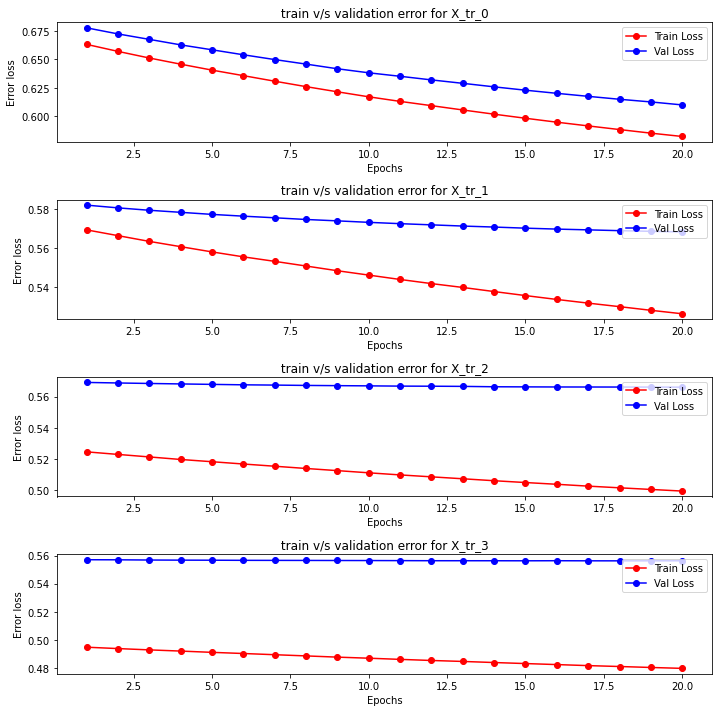

In [ ]:
learningRate = 2e-3

model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = tf.keras.metrics.BinaryAccuracy())

histories = []
for i in range(4):
    val = f'X_val_{i}'    
    tr = f'X_tr_{i}'
    histories.append(model.fit(X[tr], y_tr, epochs=20, 
                        validation_data=(X[val],y_val),
                        verbose = 0))
    
plotErrors(histories)

-	Para X_tr_0 se pude apreciar que la curva de validaci√≥n recibe un mejor desempe√±o que la de entrenamiento lo que refleja que el conjunto de datos de validaci√≥n es m√°s f√°cil de predecir que el de entrenamiento. Una explicaci√≥n podr√≠a ser que los datos de validaci√≥n son escasos, pero est√°n ampliamente representados por el conjunto de datos de entrenamiento. De todos modos, esto significa que el conjunto de datos de validaci√≥n no representa el conjunto de datos de entrenamiento, por lo que hay un problema de representatividad.

-	Para X_tr_1, X_tr_2, X_tr_3 se aprecia una amplia diferencia entre las curvas de validaci√≥n y entrenamiento se pude decir que el modelo presenta underfiting dado a la brecha existente entre las curvas, pero este an√°lisis es apresurado dado a que se realiz√≥ un entrenamiento durante solo 20 epochs es posible que el modelo se ajuste bien si el entrenamiento fuera m√°s largo dado a la tendencia descendiente que presenta la curva del loss de validaci√≥n


### Training with 2e-4

In [ ]:
learningRate = 2e-4

model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = tf.keras.metrics.BinaryAccuracy())

histories = []
for i in range(4):
    val = f'X_val_{i}'    
    tr = f'X_tr_{i}'
    histories.append(model.fit(X[tr], y_tr, epochs=20, 
                        validation_data=(X[val],y_val),
                        verbose = 0))
    
plotErrors(histories)

-	Para todos los dataset de entrenamiento el modelo presenta un gran brecha entre las curvas de loss lo que implica que el modelo presenta underfiting. A diferencia de la secci√≥n anterior las curvas no presenta una tendencia de mejora por lo que un entrenamiento mas largo no solo solucionar√≠a el problema

### Training with 2e-1



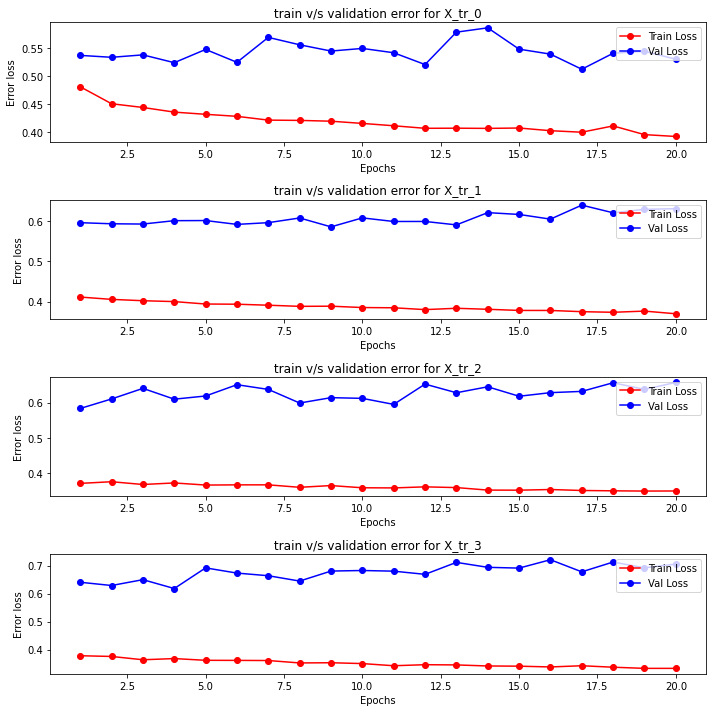

In [ ]:
learningRate = 2e-1

model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = tf.keras.metrics.BinaryAccuracy())

histories = []
for i in range(4):
    val = f'X_val_{i}'    
    tr = f'X_tr_{i}'
    histories.append(model.fit(X[tr], y_tr, epochs=20, 
                        validation_data=(X[val],y_val),
                        verbose = 0))
    
plotErrors(histories)

-	Para todos los dataset de entrenamiento las curva de validaci√≥n es sumamente irregular en su comportamiento y presenta una tendencia creciente por lo que se podr√≠a sospechar de un posible caso de overfiting, es importante mencionar que este an√°lisis solo se realizado con un entrenamiento de 20 epochs.

## F) Activaci√≥n y regularizadores l1 y l2
Se explorar distintas funciones de activaci√≥n y de regularizaci√≥n. En ambos casos se entrena la misma red entrenada anteriormente utilizando gradiente descendente estoc√°stico con _learn rate_ $\leq 2e-3$. 

* Las funciones de activaci√≥n a explorar son: tangente hiperb√≥lica, _Leaky ReLu_, sigmoidea y lineal.




In [ ]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.regularizers import l1, l2

def modelANN(function='leakyRelu', regularizer = None, rate=1e-3, bothLayer=False):

    if function == 'leakyRelu':
        if regularizer == 'l2':
            if bothLayer:
                model = Sequential()
                model.add(Dense(256,input_dim=8,activation=LeakyReLU(),activity_regularizer=l2(rate)))
                model.add(Dense(1,activation='softmax',activity_regularizer=l2(rate)))
                return model
            
            model = Sequential()
            model.add(Dense(256,input_dim=8,activation=LeakyReLU()))
            model.add(Dense(1,activation='softmax',activity_regularizer=l2(rate)))
            return model
                
        elif regularizer == 'l1':
            if bothLayer:
                model = Sequential()
                model.add(Dense(256,input_dim=8,activation=LeakyReLU(),activity_regularizer=l1(rate)))
                model.add(Dense(1,activation='softmax',activity_regularizer=l1(rate)))
                return model
            
            model = Sequential()
            model.add(Dense(256,input_dim=8,activation=LeakyReLU()))
            model.add(Dense(1,activation='softmax',activity_regularizer=l1(rate)))
            return model

        else:
            model = Sequential()
            model.add(Dense(256,input_dim=8,activation=LeakyReLU()))
            model.add(Dense(1,activation='softmax'))
            return model
    
    else:
        if regularizer == 'l2':
            if bothLayer:
                model = Sequential()
                model.add(Dense(256,input_dim=8,activation=function,activity_regularizer=l2(rate)))
                model.add(Dense(1,activation='softmax',activity_regularizer=l2(rate)))
                return model
            
            model = Sequential()
            model.add(Dense(256,input_dim=8,activation=function))
            model.add(Dense(1,activation='softmax',activity_regularizer=l2(rate)))
            return model
                
        elif regularizer == 'l1':
            if bothLayer:
                model = Sequential()
                model.add(Dense(256,input_dim=8,activation=function,activity_regularizer=l1(rate)))
                model.add(Dense(1,activation='softmax',activity_regularizer=l1(rate)))
                return model
            
            model = Sequential()
            model.add(Dense(256,input_dim=8,activation=function))
            model.add(Dense(1,activation='softmax',activity_regularizer=l1(rate)))
            return model

        else:
            model = Sequential()
            model.add(Dense(256,input_dim=8,activation=function))
            model.add(Dense(1,activation='softmax'))
            return model

### Verificar la mejor funci√≥n de activaci√≥n

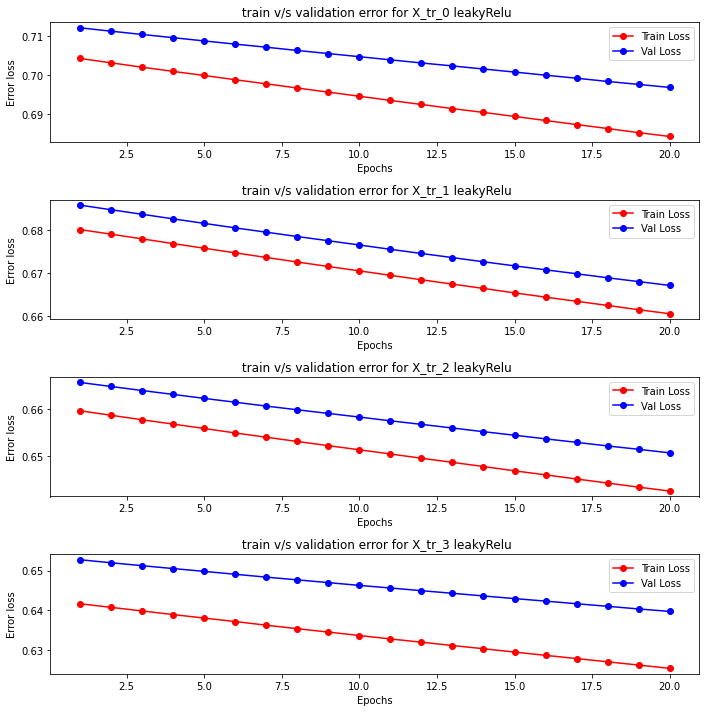

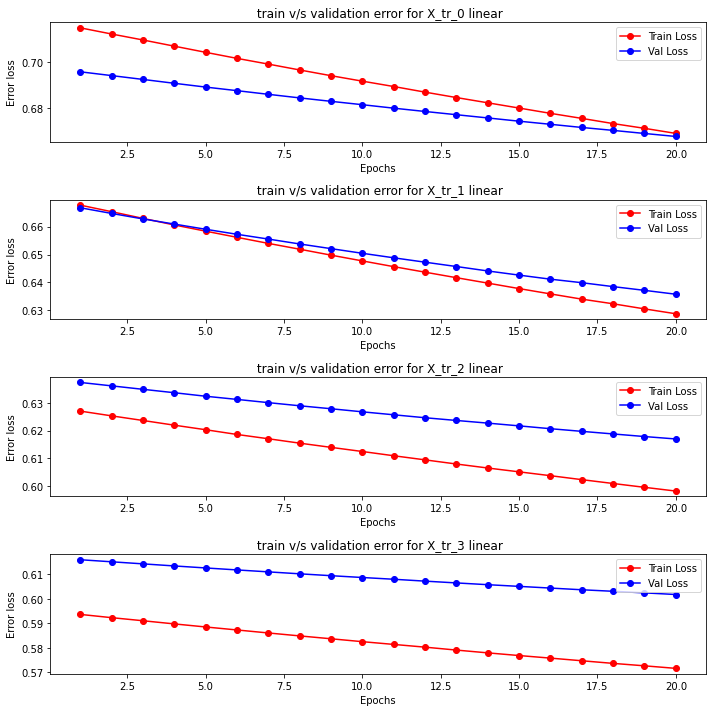

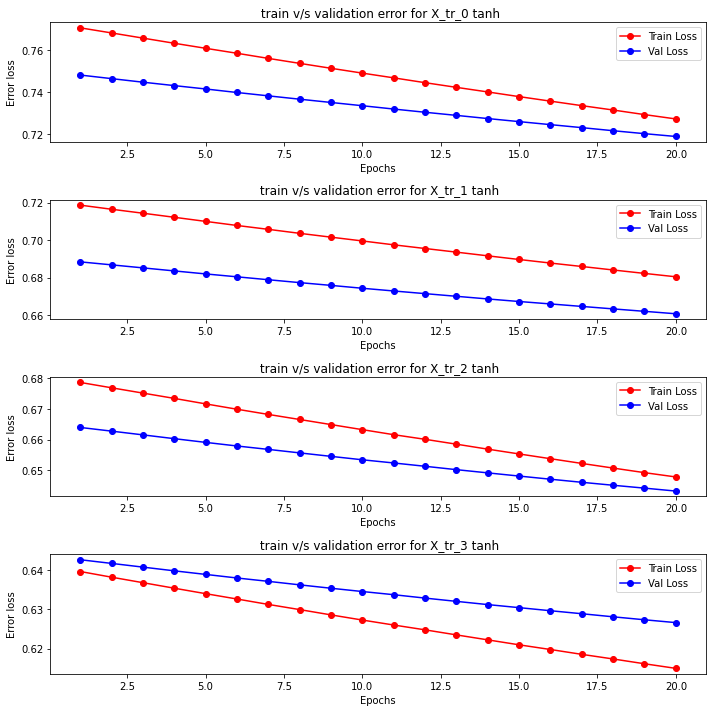

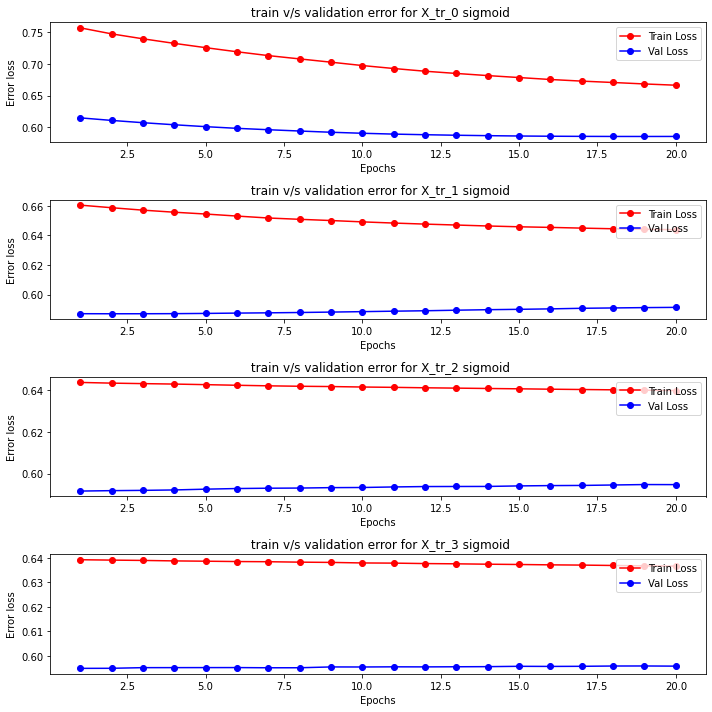

In [ ]:
# verify the best activation function
activations = ['leakyRelu','linear','tanh','sigmoid']
learningRate = 2e-4

for fun in activations:
    model = modelANN(function=fun)
    model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = tf.keras.metrics.BinaryAccuracy())

    histories = []
    for i in range(4):
        val = f'X_val_{i}'    
        tr = f'X_tr_{i}'
        histories.append(model.fit(X[tr], y_tr, epochs=20, 
                        validation_data=(X[val],y_val),
                        verbose = 0))
    
    plotErrors(histories, name=fun)

- La mejor funci√≥n de activaci√≥n de acuerdo a c√≥mo evolucionan las curvas de loss corresponde a la tangente hiperb√≥lica, esto se aprecia en como la curva de validaci√≥n empieza a converger al mismo valor que la curva de entrenamiento a lo largo de las 20 epochs de entrenamiento.

### Para la mejor funcion de activacion regularizacion L1
Se utilizan diferentes valores de rate para la regularizacion 

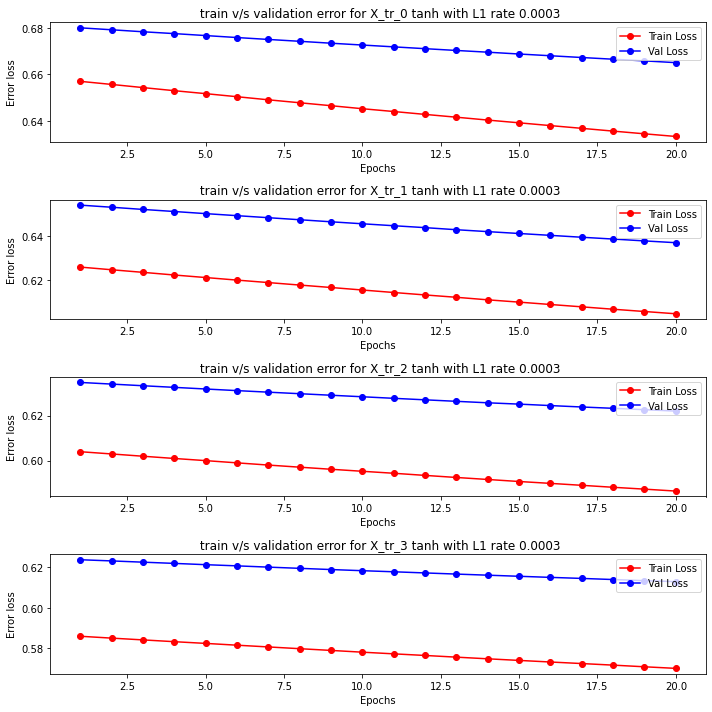

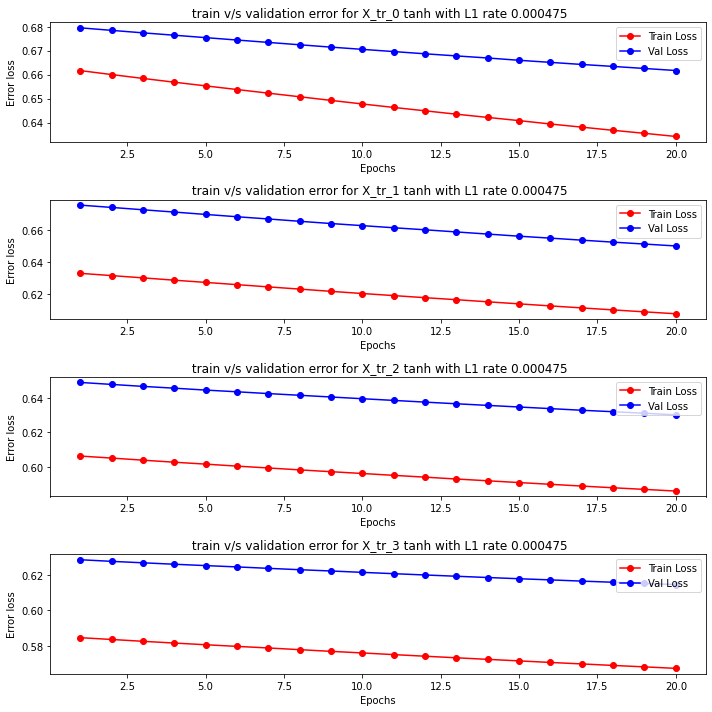

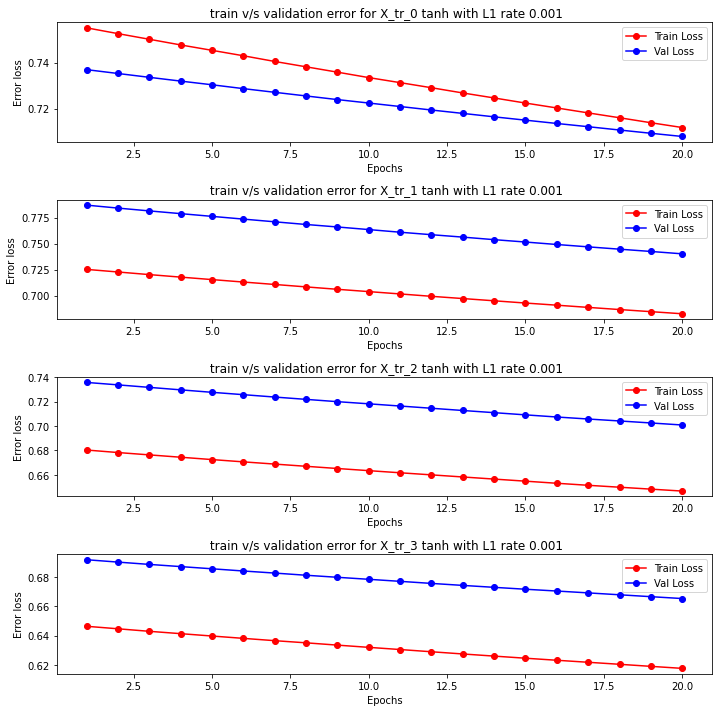

In [ ]:
fun = 'tanh'
learningRate = 2e-4
rates = np.linspace(3e-4,1e-3,num=5)

for rate_ in rates:
    model = modelANN(function=fun, regularizer = 'l1', rate=rate_)
    model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = tf.keras.metrics.BinaryAccuracy())

    histories = []
    for i in range(4):
        val = f'X_val_{i}'    
        tr = f'X_tr_{i}'
        histories.append(model.fit(X[tr], y_tr, epochs=20, 
                                validation_data=(X[val],y_val),
                                verbose = 0))
    plotErrors(histories, name=f'{fun} with L1 rate {rate_}')

### Para la mejor funcion de activacion regularizacion L2
Se utilizan diferentes valores de rate para la regularizacion 

In [ ]:
fun = 'tanh'
learningRate = 2e-4
rates = np.linspace(3e-4,1e-3,num=5)

for rate_ in rates:
    model = modelANN(function=fun, regularizer = 'l2', rate=rate_)
    model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = tf.keras.metrics.BinaryAccuracy())

    histories = []
    for i in range(4):
        val = f'X_val_{i}'    
        tr = f'X_tr_{i}'
        histories.append(model.fit(X[tr], y_tr, epochs=20, 
                                validation_data=(X[val],y_val),
                                verbose = 0))
        
    plotErrors(histories, name=f'{fun} with L2 rate {rate_}')

- ¬øQu√© ocurre si la regularizaci√≥n es muy alta o muy baja? 

### Se define un valor para la tasa de regularizaci√≥n de $4.75 e^{-4} $, y se aplica la regularizaci√≥n L2 a la capa de salida y luego a ambas capas. 



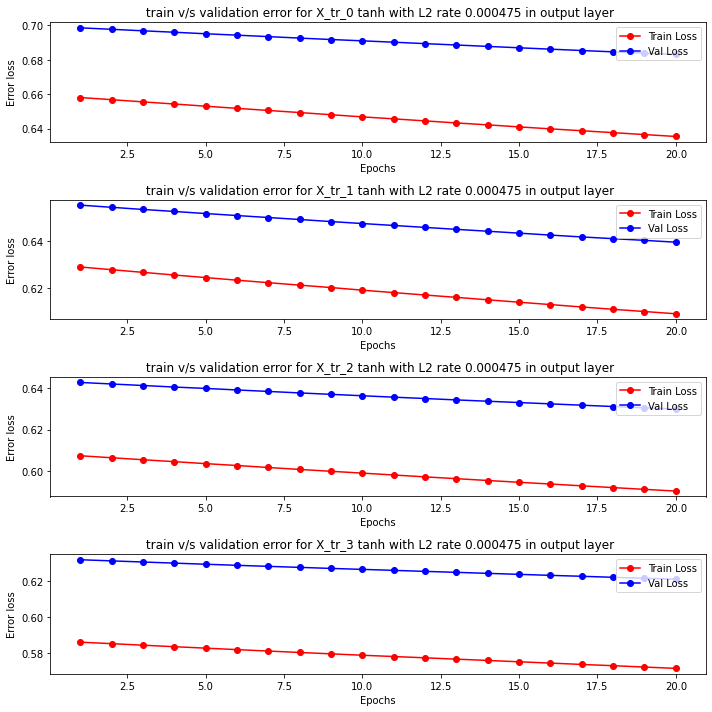

In [ ]:
# Only output layer with L2
fun = 'tanh'
learningRate = 2e-4
rate_ = 4.75e-4

model = modelANN(function=fun, regularizer = 'l2', rate=rate_)
model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = tf.keras.metrics.BinaryAccuracy())

histories = []
for i in range(4):
    val = f'X_val_{i}'    
    tr = f'X_tr_{i}'
    histories.append(model.fit(X[tr], y_tr, epochs=20, 
                            validation_data=(X[val],y_val),
                            verbose = 0))
        
plotErrors(histories, name=f'{fun} with L2 rate {rate_} in output layer')

In [ ]:
# Both layer with L2
fun = 'tanh'
learningRate = 2e-4
rate_ = 4.75e-4

model = modelANN(function=fun, regularizer = 'l2', rate=rate_, bothLayer=True)
model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = tf.keras.metrics.BinaryAccuracy())

histories = []
for i in range(4):
    val = f'X_val_{i}'    
    tr = f'X_tr_{i}'
    histories.append(model.fit(X[tr], y_tr, epochs=20, 
                            validation_data=(X[val],y_val),
                            verbose = 0))
        
plotErrors(histories, name=f'{fun} with L2 rate {rate_} in both layer')

- ¬øPara qu√© se usan activaciones no lineales? 

Se usar√° una funci√≥n no lineal debido a que le permite al el modelo adaptarse para trabajar con la mayor cantidad de datos, es decir, el modelo puede aprender y realizar tareas m√°s complejas.

- ¬øLe parece buena opci√≥n la activaci√≥n sigmoidea para la capa oculta?

De acuerdo a las curvas de Loss no es la mejor funcion de activacion, esto se puede deber a que no es una funcion centrada en cero, como la tanh que dada las curvas de Loss parece ser la mejor opcion.

- ¬øCual es la intenci√≥n de la regularizaci√≥n en general?

La regularizaci√≥n consiste en a√±adir una penalizaci√≥n a la funci√≥n de coste. Esta penalizaci√≥n produce modelos m√°s simples que generalizan mejor. Por lo tanto la intenci√≥n de la regularizaci√≥n es aumentar la generalizacion del modelo.

- En particular, ¬øQue restricci√≥n implicita imponen las regularizaciones $l$1 o $l$2 sobre los pesos de la capa en la cual se aplican? Apoyese de ecuaciones.

La regularizaci√≥n L1 reduce el coeficiente de la caracter√≠stica menos importante a cero, eliminando as√≠ algunas caracter√≠sticas. Por lo tanto, esto funciona bien para la selecci√≥n de caracter√≠sticas en caso de que tengamos un gran n√∫mero de caracter√≠sticas.

$ lossL1 = Erorr(y,\hat{y}) + ŒªŒ£_{i=1}^{N}|w_{i}| $

La regularizaci√≥n L2 a√±ade la penalizaci√≥n a medida que aumenta la complejidad del modelo. El par√°metro de regularizaci√≥n ($\lambda$) penaliza todos los par√°metros excepto el intercepto para que el modelo generalice los datos y no se sobreajuste. 

$ lossL1 = Erorr(y,\hat{y}) + ŒªŒ£_{i=1}^{N}\beta_{i}^2 $

## G) Exploraci√≥n del N√∫mero de neuronas

Ahora se prueba cambiando el n√∫mero de neuronas en la capa oculta. Para esto, se entrena la red con los hiperpar√°metros mencinados en la seccion de codigo. Se explorar a lo menos 10 n√∫mero de neuronas distintos, en potencia de base dos

Para cada red entrenada, se recupera el mejor error de validaci√≥n y el error de entrenamiento en la _epoch_ donde se obtuvo tal error de validaci√≥n. Se grafica como se comportan ambos errores a medida crece el n√∫mero de neuronas. 

In [ ]:
def modelVarNeurons(function,n_units):
    model = Sequential()
    model.add(Dense(n_units,input_dim=8,activation=function))
    model.add(Dense(1,activation='softmax'))
    return model

def plotErrors2(train_error, val_error, n_units_, name='', i='0' ): 
    xAxis = n_units_
    plt.plot(xAxis,train_error, color='red', marker='o', label='Train Loss')
    plt.plot(xAxis,val_error, color='blue', marker='o', label='Val Loss')
    plt.title(f' train v/s validation error for X_tr_{i} {name}')
    plt.xlabel('# neurons')
    plt.ylabel('Error loss') 
    plt.legend(loc="upper right")
    plt.show()

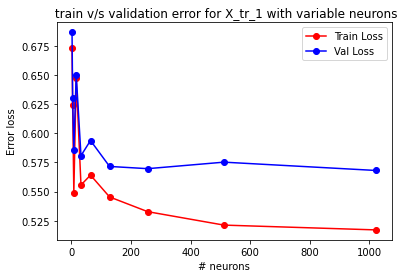

In [ ]:
fun = 'tanh'
learningRate = 2e-3
n_units = [2**i for i in range(1,11)]

for i in range(4):
    val = f'X_val_{i}'    
    tr = f'X_tr_{i}'
    train_error, val_error = [], []

    for n in n_units:
        model = modelVarNeurons(fun,n)
        model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
                      loss = tf.keras.losses.BinaryCrossentropy(),
                      metrics = tf.keras.metrics.BinaryAccuracy())


        history = model.fit(X[tr], y_tr, epochs=20, 
                                validation_data=(X[val],y_val),
                                verbose = 0)
        
        val_error.append(min(history.history['val_loss']))
        train_error.append(history.history['loss'][np.argmin(history.history['val_loss'])]) 
    
    plotErrors2(train_error, val_error,n_units, name=f'with variable neurons', i=i)

A medida que el n√∫mero de neuronas de la red aumenta se aprecia que la cuerva de test loss disminuye con la misma tasa de que la hace la train por lo cual se puede plantear que el modelo presenta overfitting, lo que implica que la red esta muy sobre ajustada los valores de entrenamiento. 
A partir se puede concluir que el mejor modelo est√° en el rango de las 180 a 200 neuronas de acuerdo al dataset que se este observando.


## H) Dropout
Un numero demasiado grande de par√°metros en el modelo puede llevarnos a observar el fenomeno de _overfitting_. Una aproximaci√≥n a este fen√≥meno que ha dado excelente resultado en redes neuronales es el m√©todo _dropout_, donde estoc√°sticamente se desactivan una fracci√≥n de las neuronas al momento del entrenamiento, as√≠ efectivamente reduciendo el tama√±o del modelo que se entrena en cada iteraci√≥n e implicitamente obteniendo modelos m√°s robustos por el simple hecho que al momento de entrenar nunca se entrena el "mismo" modelo. 

- ¬øEn qu√© consiste el fen√≥meno de _overfitting_? 

El sobreajuste es un concepto que se produce cuando un modelo se ajusta exactamente a sus datos de entrenamiento. Cuando esto ocurre, el algoritmo no puede, por desgracia, actuar con exactitud frente a los datos no vistos, lo que anula su prop√≥sito.

overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit to additional data or predict future observations reliably" *

[*] Leinweber, D. J. (2007). "Stupid data miner tricks". The Journal of Investing. 16: 15‚Äì22. doi:10.3905/joi.2007.681820. S2CID 108627390.


- ¬øPor qu√© modelos m√°s grandes suelen presentar el fen√≥meno? 

Entre mas grande se el modelo mayor ser√° su complejidad lo que provoca que este durante su proceso de entrenamiento extraiga la mayor cantidad de caracter√≠sticas/ patrones del conjunto de datos y cunado este no es lo suficientemente grande el modelo aprende aquellos patrones que corresponden a ruido lo que provoca que el modelo no cumpla con su tarea predictiva.


Se entrena la mejor red obtenida en la pregunta anterior agregando una capa de _Dropout_ con par√°metro $0.5$ inmediatamente luego de la capa oculta. Luego se repite el proceso con una red con el doble de neuronas. Note que el agregar una capa _dropout_ har√° que la red entrene m√°s lento, por lo cual es recomendable aumentar el numero de _epochs_ para entrenar la red a completitud. 


In [ ]:
from tensorflow.keras.layers import Dropout

def modelDropNeurons(function,n_units):
    model = Sequential()
    model.add(Dense(n_units,input_dim=8,activation=function))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='softmax'))
    return model

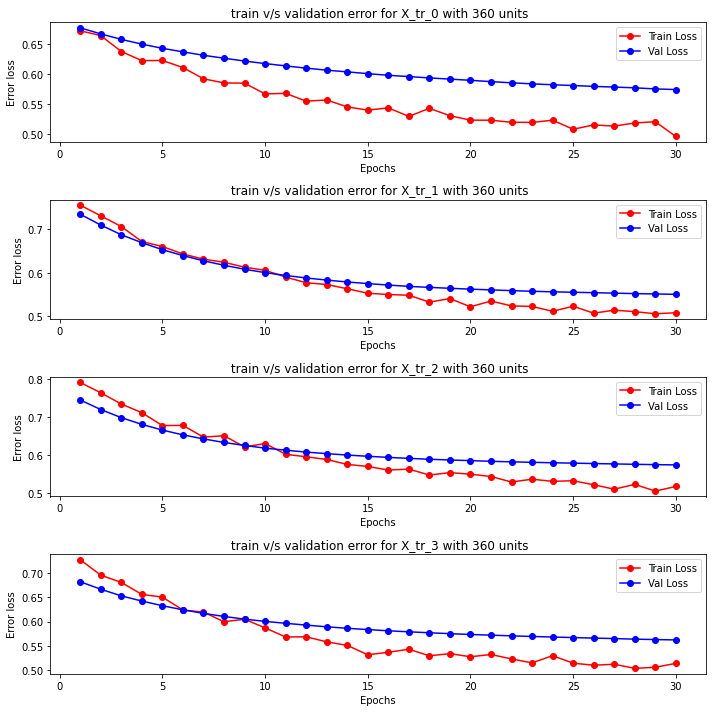

In [ ]:
fun = 'tanh'
learningRate = 2e-3
n_units = [180*i for i in range(1,3)]

for n in n_units:
    histories = []
    for i in range(4):
        val = f'X_val_{i}'    
        tr = f'X_tr_{i}'

        model = modelDropNeurons(fun,n)
        model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
                      loss = tf.keras.losses.BinaryCrossentropy(),
                      metrics = tf.keras.metrics.BinaryAccuracy())

        histories.append(model.fit(X[tr], y_tr, epochs=30, 
                                validation_data=(X[val],y_val),
                                verbose = 0))

    plotErrors(histories, numEpochs = 30 , name = f'with {n} units')       

- ¬øQu√© se observa al agregar _dropout_? Comente y compare con sus resultados anteriores. 

Al agregar dropout se aprecia que la red de 180 neuronas como la de 360 neuronas presentar un comportamiento similar de convergencias al largo del entrenamiento comparado con lo visto en la secci√≥n anterior que al aumentar al doble la cantidad de neuronas el comportamiento de la red ya tend√≠a a presentar sobreajuste

## I) Learning Rate Decay

Ahora se entrena un modelo manejando manualmente el _learn rate_. Para esto se utiliza el _callback_ `LearningRateScheduler`. Este _callback_ permite implementar una funci√≥n que maneje el _learn rate_ de nuestro modelo. 

Se escribe una funci√≥n que reciba la epoca actual y retorne un _learn rate_ lr. El lr inicial es igual a debe ser igual o mayor a alguno que haya dado buenos resultados en las preguntas anteriores. La funci√≥n debe dividir por 2 el lr cada 10 _epochs_. Adem√°s se coloca como restricci√≥n que el lr no debe ser menor a $5\times 10^{-5}$, es decir si el valor obtenido es menor a  $5\times 10^{-5}$, la funci√≥n retorna  $5\times 10^{-5}$.

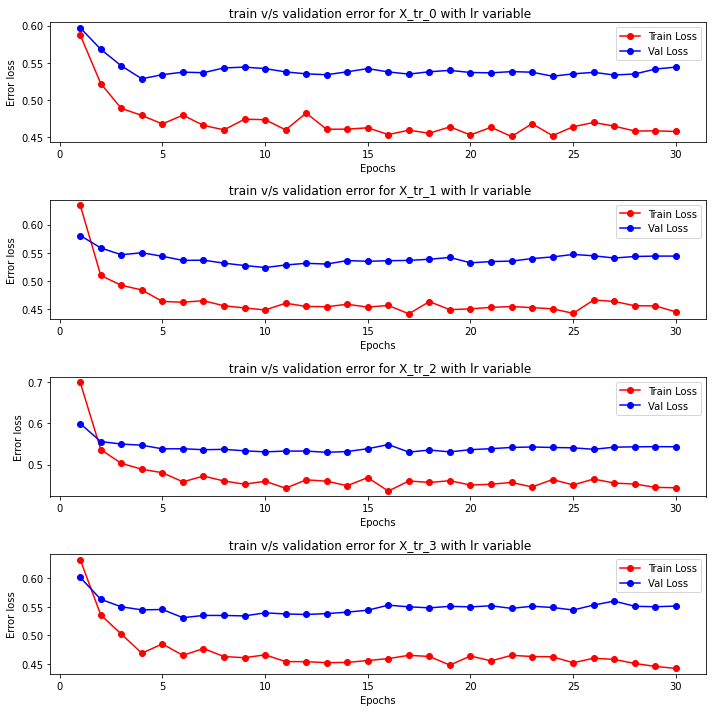

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    lr = 5e-2
    if lr < 5e-5:
        return 5e-5
    elif epoch%10 == 0:
        return lr/2
    else: 
        return lr

n = 180
fun = 'tanh'
schedule = LearningRateScheduler(step_decay)

histories = []
for i in range(4):
    val = f'X_val_{i}'    
    tr = f'X_tr_{i}'
    model = modelDropNeurons(fun,n)
    model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = tf.keras.metrics.BinaryAccuracy())

    histories.append(model.fit(X[tr], y_tr, epochs=30, 
                               validation_data=(X[val],y_val),
                               callbacks=[schedule],
                               verbose = 0))

plotErrors(histories, numEpochs = 30 , name = f'with lr variable')


- ¬øpor qu√© podr√≠a ser util disminuir el _learn rate_ a medida se avanza en el aprendizaje de la red?

Si el Lr es demasiado grande, los cambios en la funcion de optimizacion ser√°n tambi√©n muy grandes y ser√° dif√≠cil encontrar los coeficientes que minimicen la funci√≥n de coste. Por otra parte, si el Lr es demasiado peque√±o, el gradiente descendiente tardar√° mucho en encontrar la soluci√≥n adecuada.

Teniendo lo anterior en consideraci√≥n al disminuir el Lr durante el entrenamiento es posible mejorar este dado a que el paso del gradiente descendiente ser√° menor lo que implica que sea capaz de converger a un √≥ptimo local con mayor rapidez.

## J) Vanishing Gradient

`Nota:` para esta y las siguientes preguntas solo considere el mejor conjunto de entrenamiento obtenidos a partir de la imputaci√≥n, es decir, 
el conjunto $X_3$ para los entrenamientos de 20 epochs

El fen√≥meno del _vanishing gradient_ es el r√°pido decaimiento del paso de _Backpropagation_ al avanzar por las capas. A lo largo de este documento solo se ha entrenado capas con una red oculta, de igual forma que la comunidad cientifica realizo por largo tiempo, por el problema del _vanishing gradient_ y por el teorema de aproximaci√≥n universal que resumidamente demuestra que una red de una sola capa puede aproximar una amplia familia de funciones. 

Ahora se entrena una red neuronal profunda sin implementar ninguno de los dispositivos que permiten hoy en d√≠a sortear el problema del _vanishing gradient_, para ponerlo en evidencia. Para esto se construye una red con 6 capas ocultas, con la siguiente lista de numero de neuronas: [$256$ $256$ $128$ $128$ $32$  $32$].

Se grafica un histograma con los pesos de las 6 capas densas de la red sin entrenar. Luego se entrena la red a completitud y se grafica nuevamente los histogramas para las 6 capas. 


In [74]:
def modelMLP(function, initializer='glorot_uniform'):
    model = Sequential()
    model.add(Dense(256,input_dim=8,activation=function,kernel_initializer=initializer))
    model.add(Dense(256,activation=function,kernel_initializer=initializer))
    model.add(Dense(128,activation=function,kernel_initializer=initializer))
    model.add(Dense(128,activation=function,kernel_initializer=initializer))
    model.add(Dense(32,activation=function,kernel_initializer=initializer))
    model.add(Dense(32,activation=function,kernel_initializer=initializer))    
    model.add(Dense(1,activation='softmax',kernel_initializer=initializer))
    return model

def plot_bias(model,n_layers,n_bins=20,name=''):
    fig, ax = plt.subplots(n_layers,1,figsize=(10,10))
    for i in range(n_layers):
        layer_bias_weight = model.get_layer(index=i).get_weights()[1]
        ax[i].hist(layer_bias_weight, bins = n_bins)
        ax[i].title.set_text(f'bias of layer {i} {name}')
        ax[i].set_xlabel('N_bins')
        ax[i].set_ylabel('Count') 
    
    plt.tight_layout()
    plt.show()

def plot_weights(model,n_layers,n_bins=20,name=''):
    fig, ax = plt.subplots(n_layers,1,figsize=(10,10))
    for i in range(n_layers):
        layer_kernel_weights = mlp.get_layer(index=i).get_weights()[0]
        ax[i].hist(layer_kernel_weights, bins = n_bins)
        ax[i].title.set_text(f'weights of layer {i} {name}')
        ax[i].set_xlabel('N_bins')
        ax[i].set_ylabel('Count') 
    
    plt.tight_layout()
    plt.show()

def train_model(model,X,epochs_=50,learningRate=2e-3):
    val = f'X_val_3'    
    tr = f'X_tr_3'
    
    model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = tf.keras.metrics.BinaryAccuracy())

    history = model.fit(X[tr], y_tr, epochs=epochs_,
                        validation_data=(X[val],y_val),
                        verbose = 0)
    return history
    
def plotErrors3(history, numEpochs = 20, name=''):
    
    xAxis = range(1,numEpochs+1)
    yLossTrain = history.history['loss']
    yLossVal = history.history['val_loss']
    plt.plot(xAxis,yLossTrain, color='red', marker='o', label='Train Loss')
    plt.plot(xAxis,yLossVal, color='blue', marker='o', label='Val Loss')
    plt.title(f' train v/s validation error for X_tr_3 {name}')
    plt.xlabel('Epochs')
    plt.ylabel('Error loss') 
    plt.legend(loc="upper right")

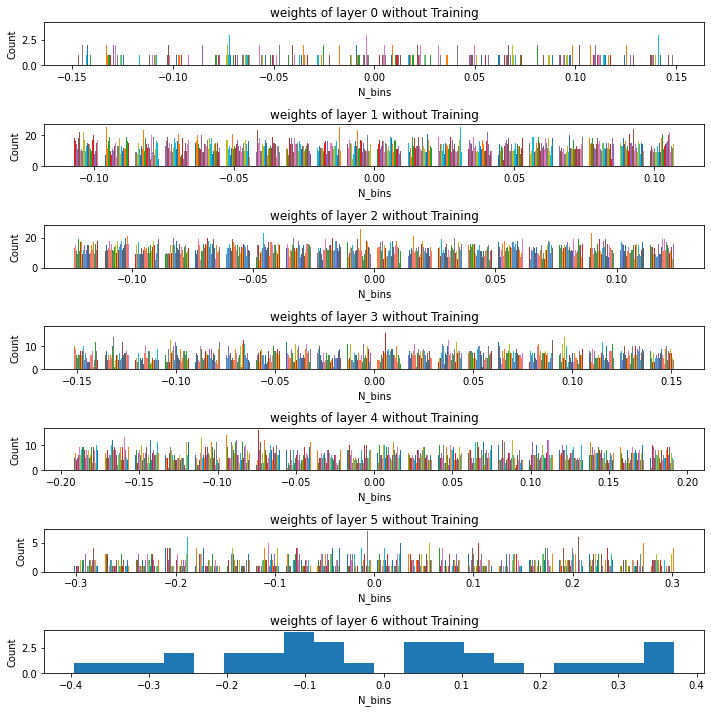

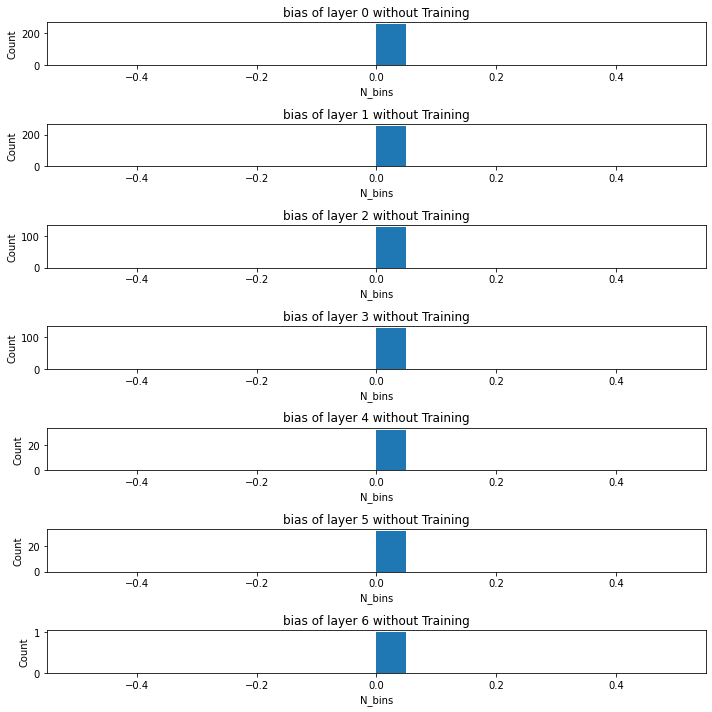

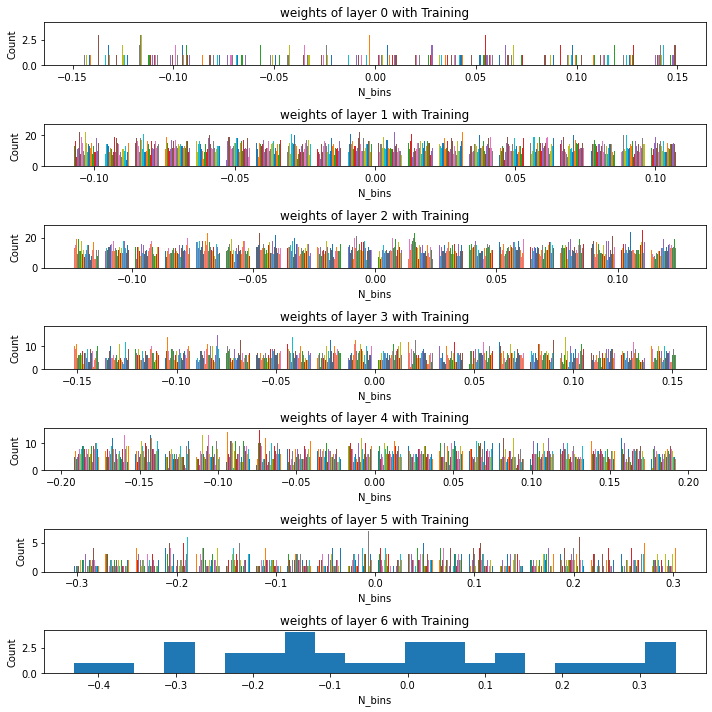

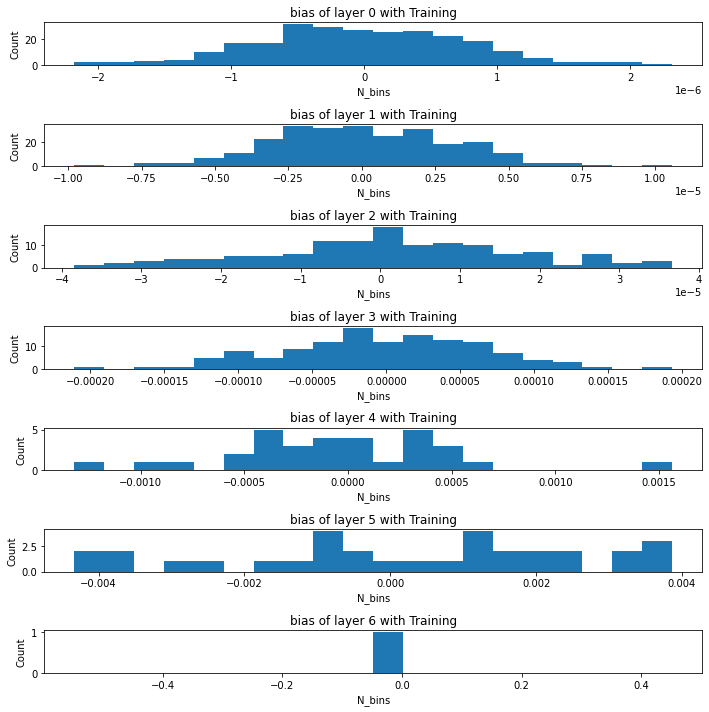

In [ ]:
fun = 'sigmoid'
mlp = modelMLP(fun)

plot_weights(mlp,7,name=f'without Training')
plot_bias(mlp,7,name=f'without Training')

history = train_model(mlp,X)

plot_weights(mlp,7,name=f'with Training')
plot_bias(mlp,7,name=f'with Training')

A partir de los grafios se puede apreciar como despu√©s del entrenamiento las ultimas capa  ajusta mas sus pesos que las primeras capas, es decir, la capa uno y dos casi no sufren modificaciones ya que en el histograma se aprecia que para un mismo peso de la condici√≥n inicial existe la misma cantidad de instancias despu√©s del entrenamiento, mostrando as√≠ los efectos que causa el desvanecimiento del gradiente.


Luego, se prueba cambiar la inizializaci√≥n de los pesos de la capa densa. puede revisar la documentaci√≥n de keras para ver las opciones existentes a parte de `glorot_uniform` por defecto. 




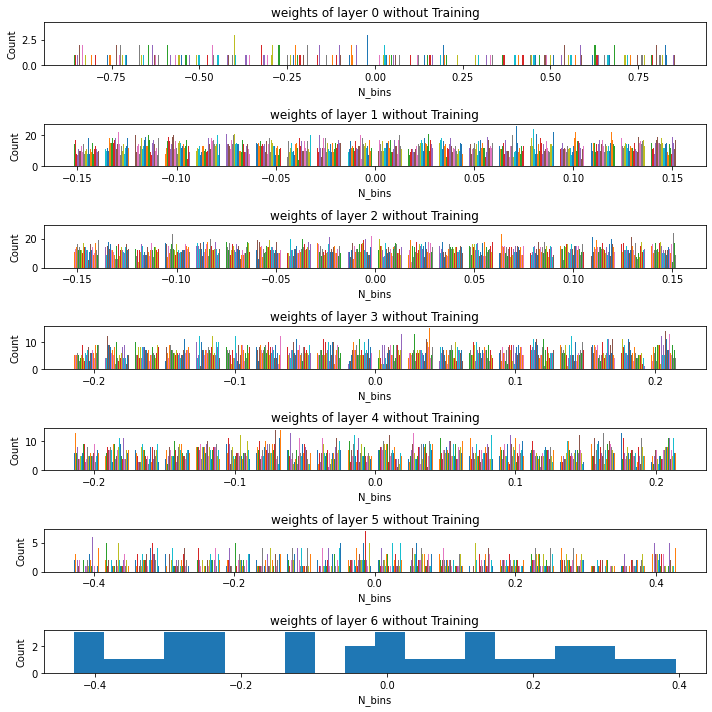

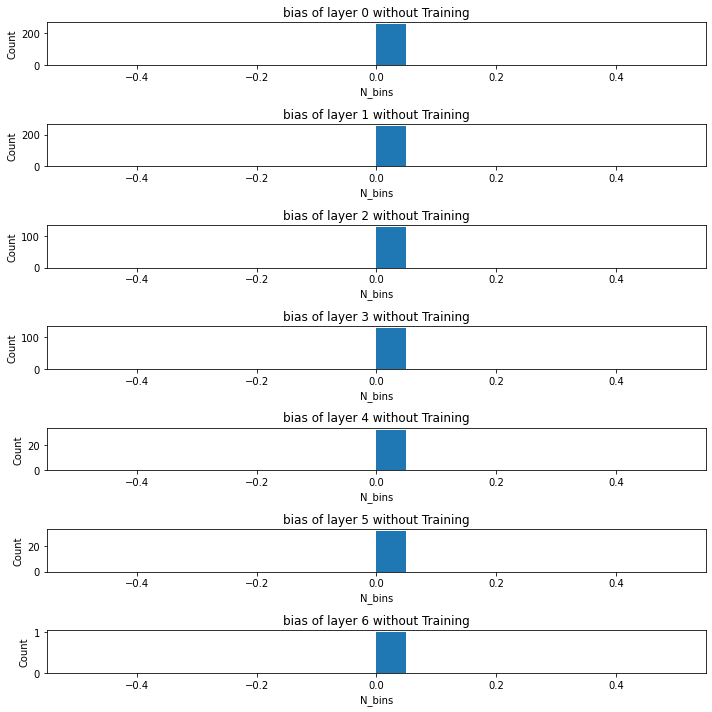

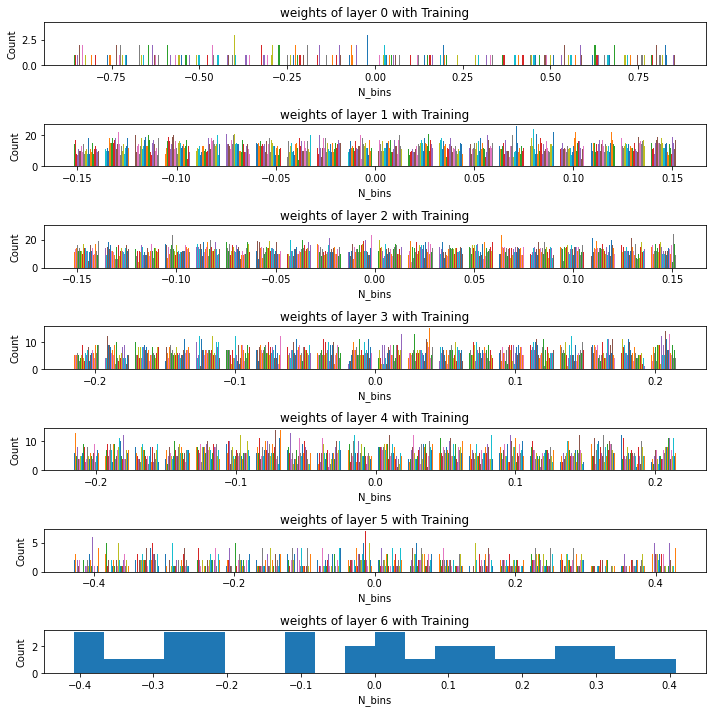

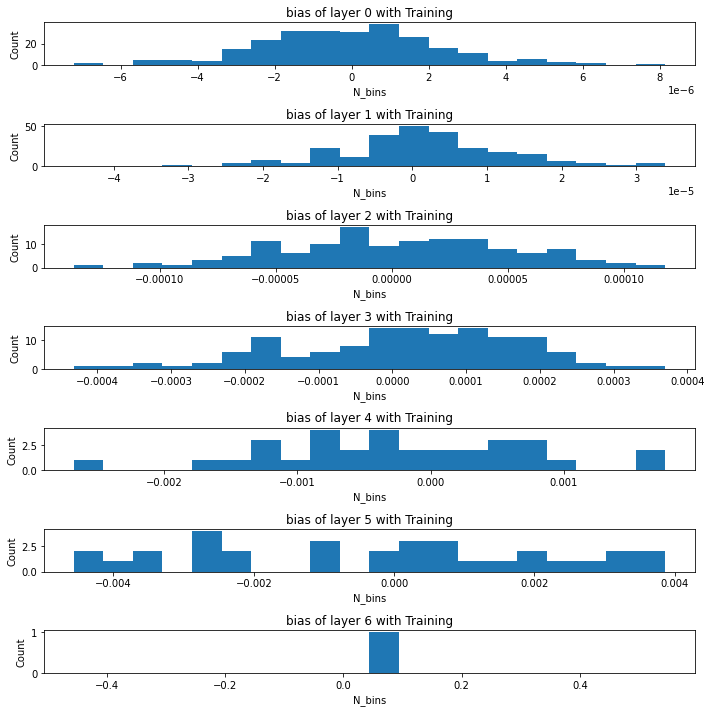

In [ ]:
fun = 'sigmoid'
initializer = tf.keras.initializers.HeUniform()

mlp = modelMLP(fun,initializer)

plot_weights(mlp,7,name=f'without Training')
plot_bias(mlp,7,name=f'without Training')

history = train_model(mlp,X)

plot_weights(mlp,7,name=f'with Training')
plot_bias(mlp,7,name=f'with Training')

- ¬øSe logra solucionar el problema? 

El problema no es solucionado del todo solo cambiando el m√©todo de inicializaci√≥n de los pesos de cada capa pero si se ve una vele mejora a partir de los gr√°ficos

Por √∫ltimo, se prueba aumentar la tasa de aprendizaje para ver si logra hacer que el paso de _backpropagation_ alcance las capas que anteriormente no se entrenaban. 

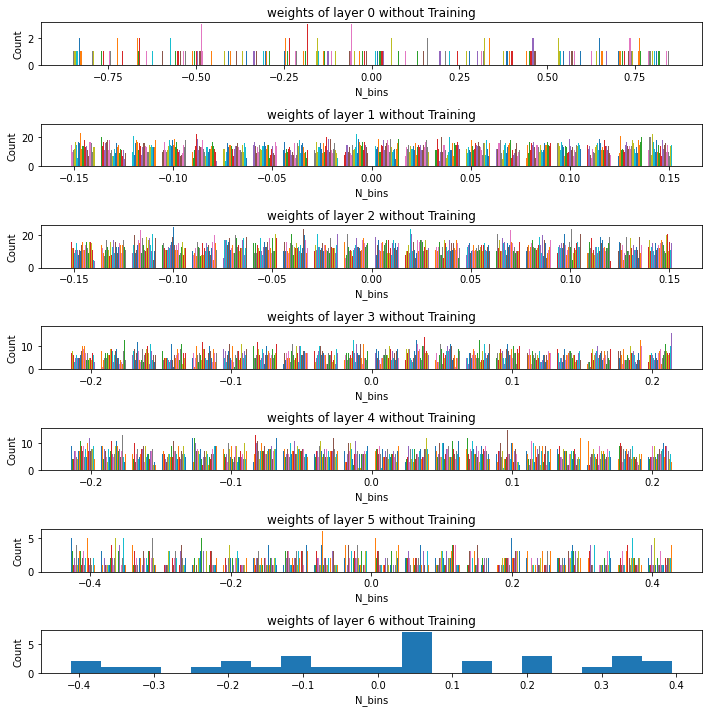

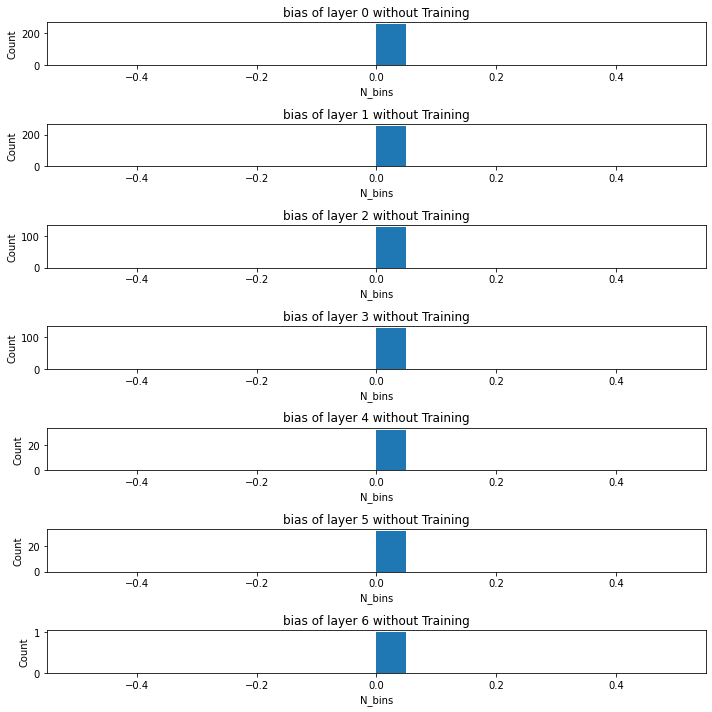

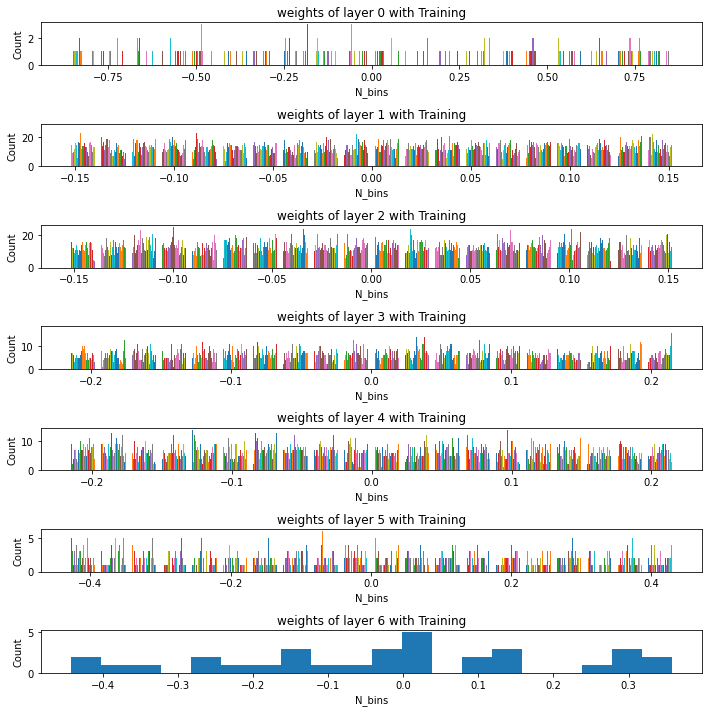

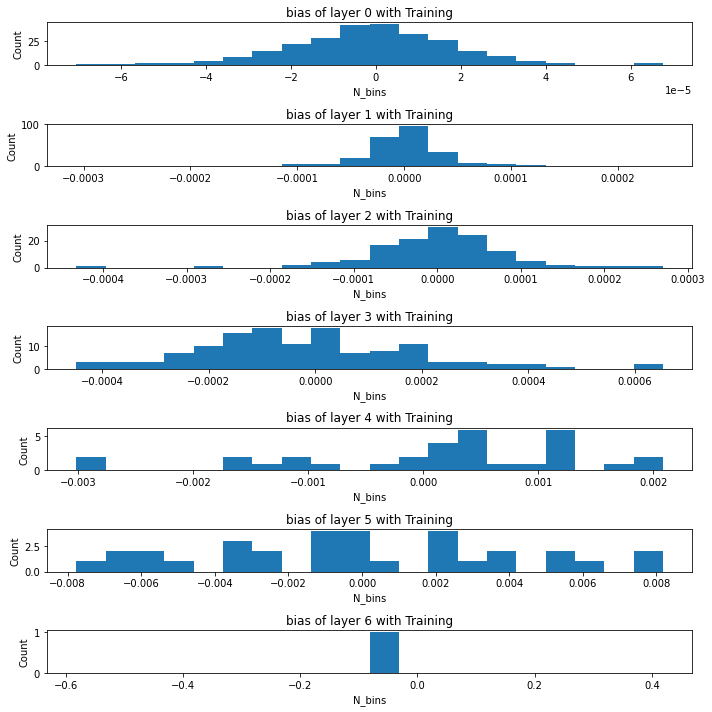

In [75]:
fun = 'sigmoid'
initializer = tf.keras.initializers.HeUniform()

mlp = modelMLP(fun,initializer)

plot_weights(mlp,7,name=f'without Training')
plot_bias(mlp,7,name=f'without Training')

history = train_model(mlp,X,learningRate=2e-2)

plot_weights(mlp,7,name=f'with Training')
plot_bias(mlp,7,name=f'with Training')

In [77]:
mlp = modelMLP(fun,initializer)
history = train_model(mlp,X,epochs_=20,learningRate=2e-2)
plotErrors3(history, numEpochs = 20)

## K) Batch Normalization

Una manera propuesta de mejorar los desempe√±os de las redes es Batch Normalization. Se entrena la red  de la pregunta anterior, agregando capas de _Batch Normalization_ antes de cada funci√≥n de activaci√≥n. Luego se prueba agregando capas de _Batch Normalization_ despu√©s de cada funci√≥n de activaci√≥n.

- ¬øQu√© realiza _Batch Normalization_ en t√©rminos matem√°ticos?.

En cada capa oculta, _Batch Normalization_ transforma la se√±al usando las siguietes ecuaciones:

![BN1](https://miro.medium.com/max/640/1*zdscSj6nEGsxUxplWHN-kg.png)
![BN2](https://miro.medium.com/max/640/1*89JEFNiKgg16hPtBY25YdQ.gif)

La capa BN determina primero la media $\mu$ y la varianza $\sigma^2$ de los valores de activaci√≥n en el lote, utilizando (1) y (2).

A continuaci√≥n, normaliza el vector de activaci√≥n $Z^{(i)}$ con (3). De esta manera, la salida de cada neurona sigue una distribuci√≥n normal est√°ndar en todo el lote. (ùúÄ es una constante utilizada para la estabilidad num√©rica)

Finalmente, calcula la salida de la capa $·∫ê(i)$ aplicando una transformaci√≥n lineal con ùõæ y ùõΩ, dos par√°metros entrenables (4). Este paso permite al modelo elegir la distribuci√≥n √≥ptima para cada capa oculta

- En t√©rminos de aprendizaje, ¬øQu√© evita la utilizaci√≥n de _Batch Normalization_?

Entrenamiento m√°s r√°pido. Debido a que la normalizaci√≥n por lotes reduce el cambio de covariable interno y fija la distribuci√≥n de las activaciones de la red, la red puede utilizar mayores tasas de aprendizaje y la red puede ser entrenada m√°s r√°pidamente.

Reduce the internal covariate shift, which is the ‚Äúchange in the distribution of network activations due to the change in network parameters during training‚Äù (Ioffe & Szegedy, 2015).

In [68]:
from tensorflow.keras.layers import BatchNormalization

def model_MLP_BN(function, initializer='glorot_uniform', before = True):
    if before:
        model = Sequential()
        model.add(Dense(256,input_dim=8,activation=function,kernel_initializer=initializer))
        
        model.add(BatchNormalization())
        model.add(Dense(256,activation=function,kernel_initializer=initializer))
        
        model.add(BatchNormalization())
        model.add(Dense(128,activation=function,kernel_initializer=initializer))
        
        model.add(BatchNormalization())
        model.add(Dense(128,activation=function,kernel_initializer=initializer))
        
        model.add(BatchNormalization())
        model.add(Dense(32,activation=function,kernel_initializer=initializer))
        
        model.add(BatchNormalization())
        model.add(Dense(32,activation=function,kernel_initializer=initializer))    
        
        model.add(BatchNormalization())
        model.add(Dense(1,activation='softmax',kernel_initializer=initializer))
        return model

    model = Sequential()
    model.add(Dense(256,input_dim=8,activation=function,kernel_initializer=initializer))
    model.add(BatchNormalization())

    model.add(Dense(256,activation=function,kernel_initializer=initializer))
    model.add(BatchNormalization())
    
    model.add(Dense(128,activation=function,kernel_initializer=initializer))
    model.add(BatchNormalization())
    
    model.add(Dense(128,activation=function,kernel_initializer=initializer))
    model.add(BatchNormalization())
    
    model.add(Dense(32,activation=function,kernel_initializer=initializer))
    model.add(BatchNormalization())
    
    model.add(Dense(32,activation=function,kernel_initializer=initializer))    
    model.add(BatchNormalization())
    
    model.add(Dense(1,activation='softmax',kernel_initializer=initializer))
    model.add(BatchNormalization())
    
    return model

In [78]:
fun = 'sigmoid'
initializer = tf.keras.initializers.HeUniform()

mlp = model_MLP_BN(fun,initializer)
history = train_model(mlp,X,epochs_=20,learningRate=2e-2)
plotErrors3(history, numEpochs = 20,name='BN before')

In [72]:
mlp = model_MLP_BN(fun,initializer,before=False)
history = train_model(mlp,X,epochs_=20,learningRate=2e-2)
plotErrors3(history, numEpochs = 20, name='BN after')

- ¬øMejoran los desempe√±os de la red agregando _Batch Normalization_?¬øExiste diferencias entre una capa de _Batch Normalization_ justo antes o justo despu√©s de la funci√≥n de activaci√≥n en t√©rminos de aprendizaje?

Si, como se aprecia en el grafico de usar BN mejora el rendimiento de la red solo para cuando se utliza esta capa antes de la funcion de activacion en caso contrario causa un sobre a juste del modelo.  

## L) Otros Optimizadores

Utilizando la arquitectura de red que mejor se haya desempe√±ado a lo largo del documnto, se entrena utilizando un optimizador distinto al gradiente descendente estoc√°stico. 

Notar que por las inicializaciones por defecto de los pesos de las capas y la naturaleza de los datos en cuesti√≥n, puede ocurrir que para los valores defecto de algunos optimizadores la red diverga en las primeras iteraciones. 

Compare como se desempe√±an estos optimizadores con la versi√≥n utilizada anteriormente, considerando los tiempos de entrenamiento y el desempe√±o final alcanzado. Apoyese de gr√°ficos. 

In [82]:
def train_model_opt(model,X,opt='SDG',epochs_=50,learningRate=2e-3):
    val = f'X_val_3'    
    tr = f'X_tr_3'

    if opt == 'Adam': 
        model.compile(tf.keras.optimizers.Adam(learning_rate=learningRate),
                      loss = tf.keras.losses.BinaryCrossentropy(),
                      metrics = tf.keras.metrics.BinaryAccuracy())

    elif opt == 'RMSprop':
        model.compile(tf.keras.optimizers.RMSprop(learning_rate=learningRate),
                      loss = tf.keras.losses.BinaryCrossentropy(),
                      metrics = tf.keras.metrics.BinaryAccuracy())

    else:    
        model.compile(tf.keras.optimizers.SGD(learning_rate=learningRate),
                      loss = tf.keras.losses.BinaryCrossentropy(),
                      metrics = tf.keras.metrics.BinaryAccuracy())

    history = model.fit(X[tr], y_tr, epochs=epochs_,
                        validation_data=(X[val],y_val),
                        verbose = 0)
    return history

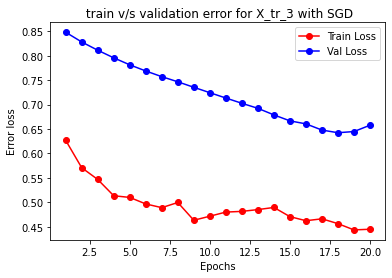

In [85]:
mlp = model_MLP_BN(fun,initializer)
history = train_model_opt(mlp,X,epochs_=20,learningRate=2e-3)
plotErrors3(history, numEpochs = 20, name='with SGD')

In [86]:
mlp = model_MLP_BN(fun,initializer)
history = train_model_opt(mlp,X,opt='Adam',epochs_=20,learningRate=2e-3)
plotErrors3(history, numEpochs = 20, name='with Adam')

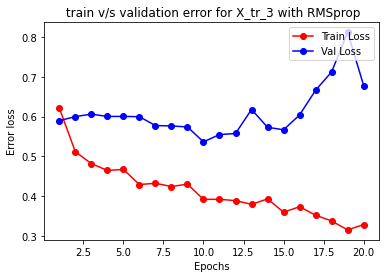

In [87]:
mlp = model_MLP_BN(fun,initializer)
history = train_model_opt(mlp,X,opt='RMSprop',epochs_=20,learningRate=2e-3)
plotErrors3(history, numEpochs = 20, name='with RMSprop')

## M) Testing 

Finalmente, luego de entrenar todos estos modelos se esta en condiciones de probar que tan bien fue nuestro desempe√±o.le el error Para esto utilice el modelo en el cual obtuvo el mejor desempe√±o en validaci√≥n y calcu de la predicci√≥n realizada sobre el _Test set_. Puede utilizar el metodo `.predict` de su modelo. 

¬øQu√© tan bien se desempe√±ar√≠a su modelo en un caso real en vista de lo anterior? 

En un caso de la vida real la maquina no presenta un comportamiento al igual que lanzar una moneda para la clase uno y para la clase cero no es capaz de detectarla esto se puede deber a que en el conjunto de entrenamiento existen pocas muestras de la clase.

In [118]:
from sklearn.metrics import classification_report

mlp = model_MLP_BN(fun,initializer)
history = train_model_opt(mlp,X,epochs_=20,learningRate=2e-3)
plotErrors3(history, numEpochs = 20, name='SDG') 

y_pred = mlp.predict(X['X_test_3'])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.35      1.00      0.52        27

    accuracy                           0.35        77
   macro avg       0.18      0.50      0.26        77
weighted avg       0.12      0.35      0.18        77



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
